In [1]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [2]:
import numpy as np
import scipy
from scipy import stats
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
data1 = pd.read_csv("heart.csv")
data1.info()
data1.shape



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


(303, 14)

In [4]:
from sklearn.model_selection import train_test_split
data1 = data1.drop_duplicates()
Q1 = data1.quantile(0.25)
Q3 = data1.quantile(0.75)
IQR = Q3-Q1
z = np.abs(stats.zscore(data1))
data3 = data1[(z<3).all(axis=1)]
data3.shape
data2 = data1[~((data1<(Q1-1.5*IQR))|(data1>(Q3+1.5*IQR))).any(axis=1)]
data_f=data3.copy()
x=data_f.drop(['output'],axis=1)
y=data_f['output']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [ ]:
data3

In [86]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(200, activation='relu', input_dim=13))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


In [93]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
history=model.fit(x_train,y_train,epochs=85)

Epoch 1/85
7/7 [==============================] - 3s 4ms/step - loss: 0.7734 - accuracy: 0.6950
Epoch 2/85
7/7 [==============================] - 0s 5ms/step - loss: 0.6089 - accuracy: 0.7750
Epoch 3/85
7/7 [==============================] - 0s 5ms/step - loss: 0.3949 - accuracy: 0.8200
Epoch 4/85
7/7 [==============================] - 0s 4ms/step - loss: 0.3366 - accuracy: 0.8700
Epoch 5/85
7/7 [==============================] - 0s 4ms/step - loss: 0.3355 - accuracy: 0.8600
Epoch 6/85
7/7 [==============================] - 0s 4ms/step - loss: 0.3440 - accuracy: 0.8300
Epoch 7/85
7/7 [==============================] - 0s 4ms/step - loss: 0.3131 - accuracy: 0.8550
Epoch 8/85
7/7 [==============================] - 0s 5ms/step - loss: 0.3275 - accuracy: 0.8250
Epoch 9/85
7/7 [==============================] - 0s 4ms/step - loss: 0.3122 - accuracy: 0.8450
Epoch 10/85
7/7 [==============================] - 0s 4ms/step - loss: 0.3253 - accuracy: 0.8650
Epoch 11/85
7/7 [======================

In [94]:
y=model.predict(x_test)

3/3 [==============================] - 0s 4ms/step


In [95]:
for i in range(0,len(y)):
  y[i]=1 if y[i]>=0.5 else 0
y_out=[]
for i in range(0,len(y)):
  y_out.append(int(y[i][0]))

In [96]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_out)

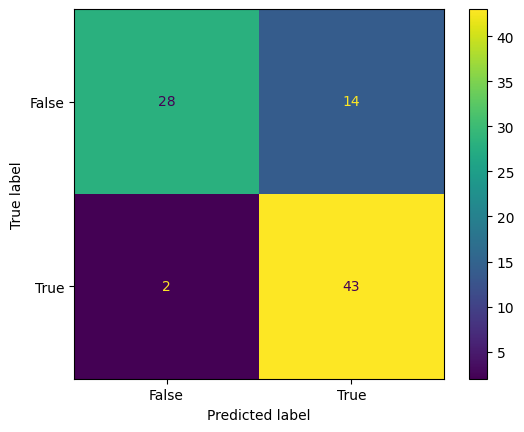

In [97]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
import matplotlib.pyplot as plt
cm_display.plot()
plt.show()

In [98]:
Accuracy = metrics.accuracy_score(y_test, y_out)
print("Validation Accuracy",Accuracy)

Validation Accuracy 0.8160919540229885
